<a href="https://colab.research.google.com/github/manoramapatel12345/Diwali-Sales-Analysis/blob/main/Diwali_sales_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df = pd.read_csv('/content/drive/MyDrive/Diwali Sales Data.csv', encoding= 'unicode_escape')
df.head(10)

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.00,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.00,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.00,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.00,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.00,NaN,NaN
5,1000588,Joni,P00057942,M,26-35,28,1,Himachal Pradesh,Northern,Food Processing,Auto,1,23877.00,NaN,NaN
6,1001132,Balk,P00018042,F,18-25,25,1,Uttar Pradesh,Central,Lawyer,Auto,4,23841.00,NaN,NaN
7,1002092,Shivangi,P00273442,F,55+,61,0,Maharashtra,Western,IT Sector,Auto,1,NaN,NaN,NaN
8,1003224,Kushal,P00205642,M,26-35,35,0,Uttar Pradesh,Central,Govt,Auto,2,23809.00,NaN,NaN
9,1003650,Ginny,P00031142,F,26-35,26,1,Andhra Pradesh,Southern,Media,Auto,4,23799.99,NaN,NaN


In [5]:
df.shape

(11251, 15)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [7]:
pd.isnull(df)

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True
1,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True
2,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True
3,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True
4,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11246,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True
11247,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True
11248,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True
11249,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True


In [8]:
# drop unrelated/blank columns
df.drop(['Status', 'unnamed1'], axis=1, inplace=True)

In [9]:
#check for full null value
df.isnull().sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [10]:
df.shape

(11251, 13)

In [11]:
# drop null values
df.dropna(inplace=True)

In [12]:
df.shape

(11239, 13)

In [13]:
#change data type
df['Amount'] = df['Amount'].astype('int')

In [14]:
df['Amount'].dtypes

dtype('int64')

In [15]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [16]:
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.123900e+04,11239.000000,11239.000000,11239.000000,11239.000000
mean,1.003004e+06,35.410357,0.420055,2.489634,9453.610553
std,1.716039e+03,12.753866,0.493589,1.114967,5222.355168
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,2.000000,5443.000000
50%,1.003064e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004426e+06,43.000000,1.000000,3.000000,12675.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


####Exploratory Data Analysis (EDA)

Gender

In [17]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

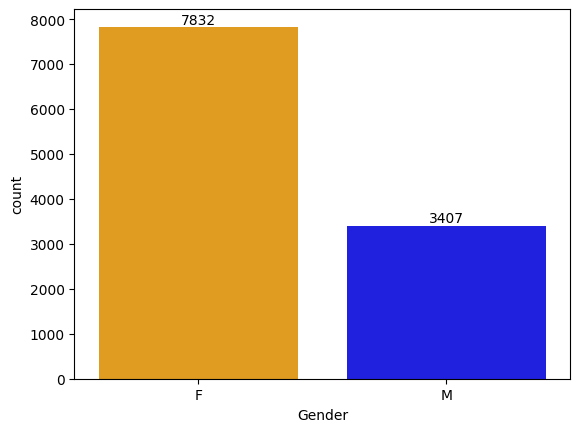

In [18]:
custom_palette = {'M': 'Blue', 'F': 'Orange'}
ax = sns.countplot(x = 'Gender', data = df, palette = custom_palette)
for bar in ax.containers:
  ax.bar_label(bar)

In [20]:
df.groupby(['Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

,Gender,Amount
0,F,74335853
1,M,31913276


<Axes: xlabel='Gender', ylabel='Amount'>

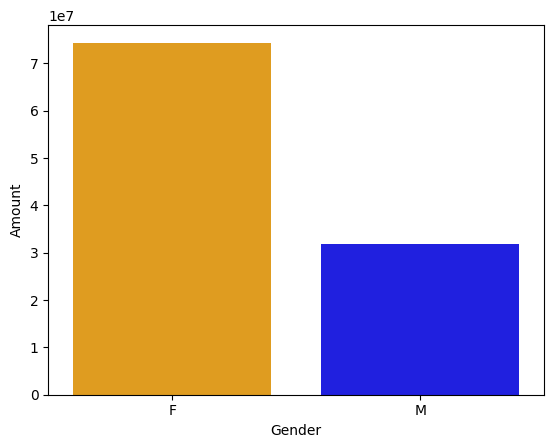

In [19]:
sales_gen = df.groupby(['Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
sns.barplot(x = 'Gender', y = 'Amount', data = sales_gen, palette = custom_palette)

####Insights- from above graphs we can see the most of the buyer are Female and even the purchasing power of the female are gender the man.

####**Age**

In [21]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

<Axes: xlabel='Age Group', ylabel='count'>

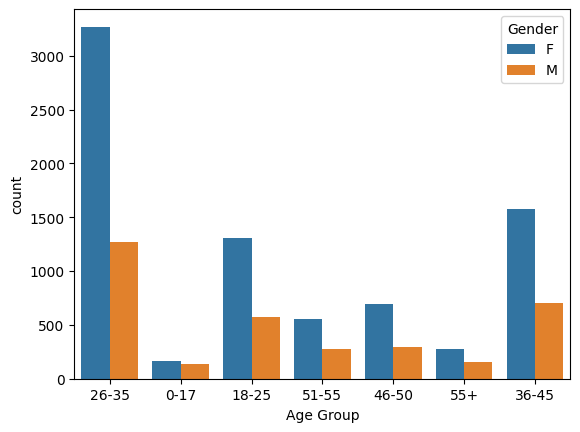

In [22]:
sns.countplot(data = df, x = 'Age Group', hue = 'Gender')

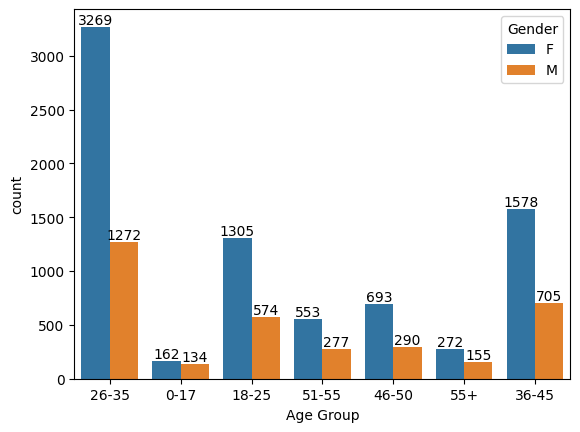

In [ ]:
ax = sns.countplot(data = df, x = 'Age Group', hue = 'Gender')
for bar in ax.containers:
  ax.bar_label(bar)

#### Total amount vs Age group

<Axes: xlabel='Age Group', ylabel='Amount'>

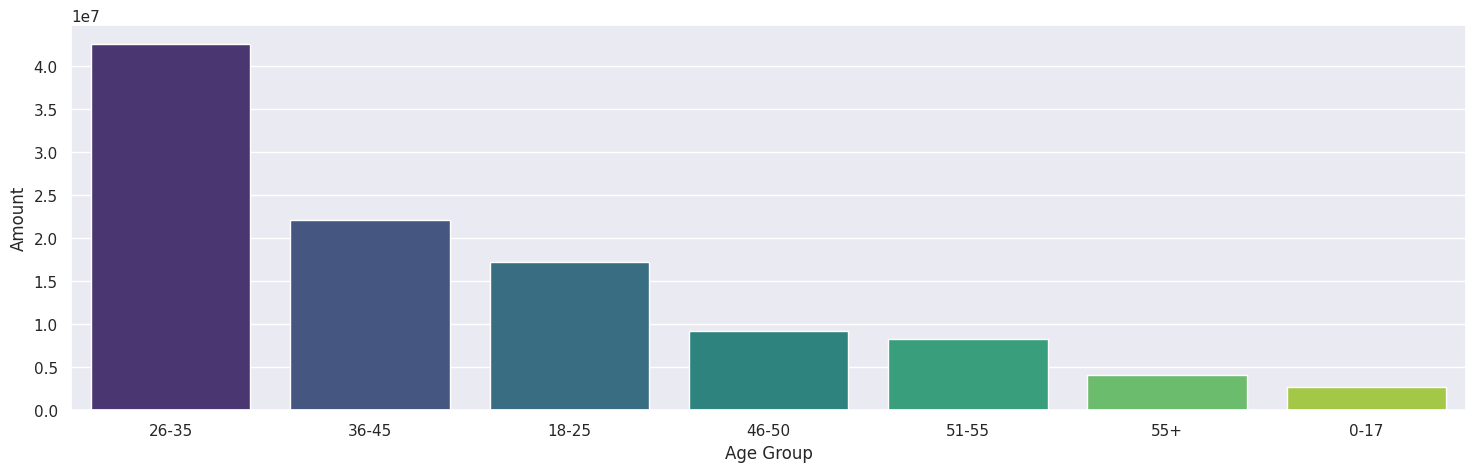

In [24]:
# total amount vs age group
sns.set(rc={'figure.figsize':(18,5)})
sales_age = df.groupby(['Age Group'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
sns.barplot(x = 'Age Group', y = 'Amount', data = sales_age, palette='viridis')



####Insights- In above graphs we found most of the buyers in Age Group 26-35 years females

####**State**

In [25]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

<Axes: xlabel='State', ylabel='Orders'>

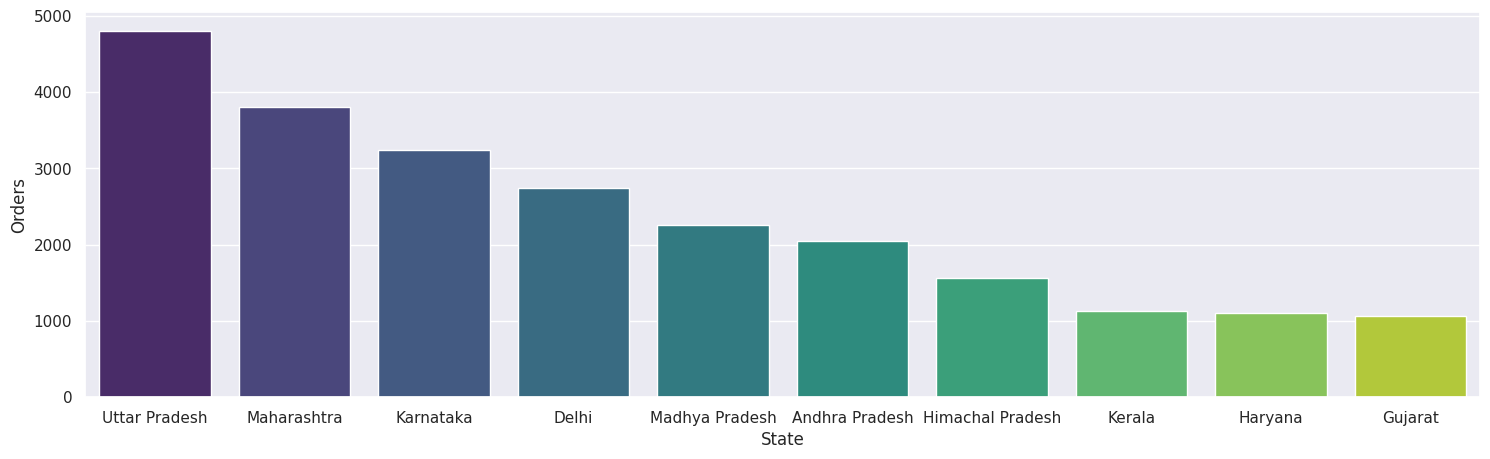

In [28]:
# total number of order from top 10 states
sales_state = df.groupby(['State'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)
sns.set(rc={'figure.figsize':(18,5)})
sns.barplot (data = sales_state, x= 'State', y = 'Orders',palette='viridis')


<Axes: xlabel='State', ylabel='Amount'>

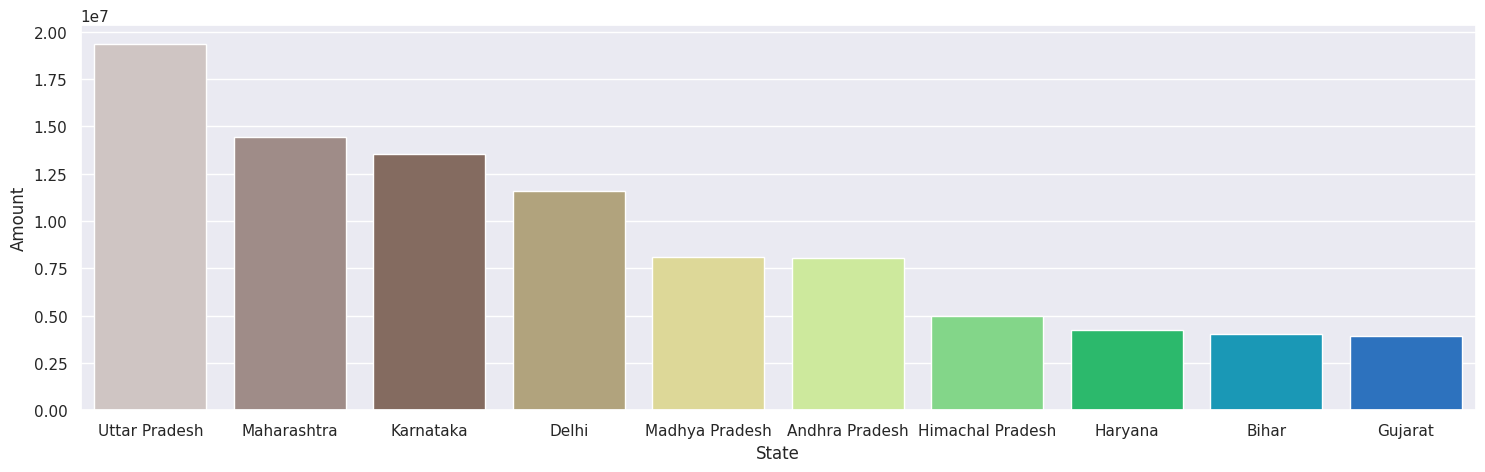

In [35]:
# total number of order from top 10 states
sales_state = df.groupby(['State'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)
sns.set(rc={'figure.figsize':(18,5)})
sns.barplot (data = sales_state, x= 'State', y = 'Amount', palette = 'terrain_r')


From above graphs we can see that most of the orders and total sales/amount are from Uttar Pradesh, Maharashtra and Karnatka respectively

#### Marital Status

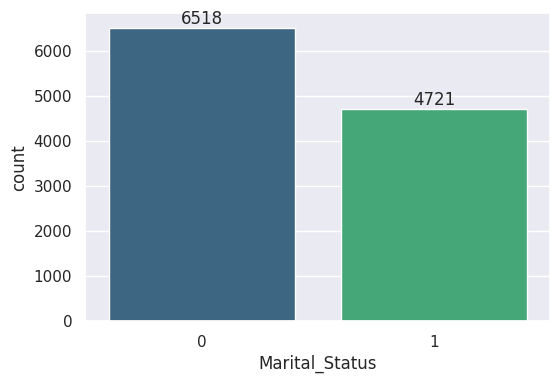

In [38]:
ax = sns.countplot(data = df, x = 'Marital_Status', palette='viridis')
sns.set(rc={'figure.figsize':(6,4)})
for bar in ax.containers:
  ax.bar_label(bar)

#### Marital status

0 = Married, 1 = Unmarried

<Axes: xlabel='Marital_Status', ylabel='Amount'>

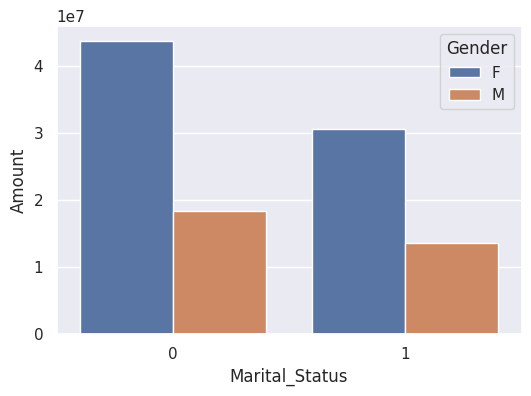

In [39]:
sales_state = df.groupby(['Marital_Status', 'Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
sns.set(rc={'figure.figsize':(6,4)})
sns.barplot (data = sales_state, x= 'Marital_Status', y = 'Amount', hue = 'Gender')

From above graphs we can see that most of the buyers are married (women) and they have purchashing power

####**Occupation**

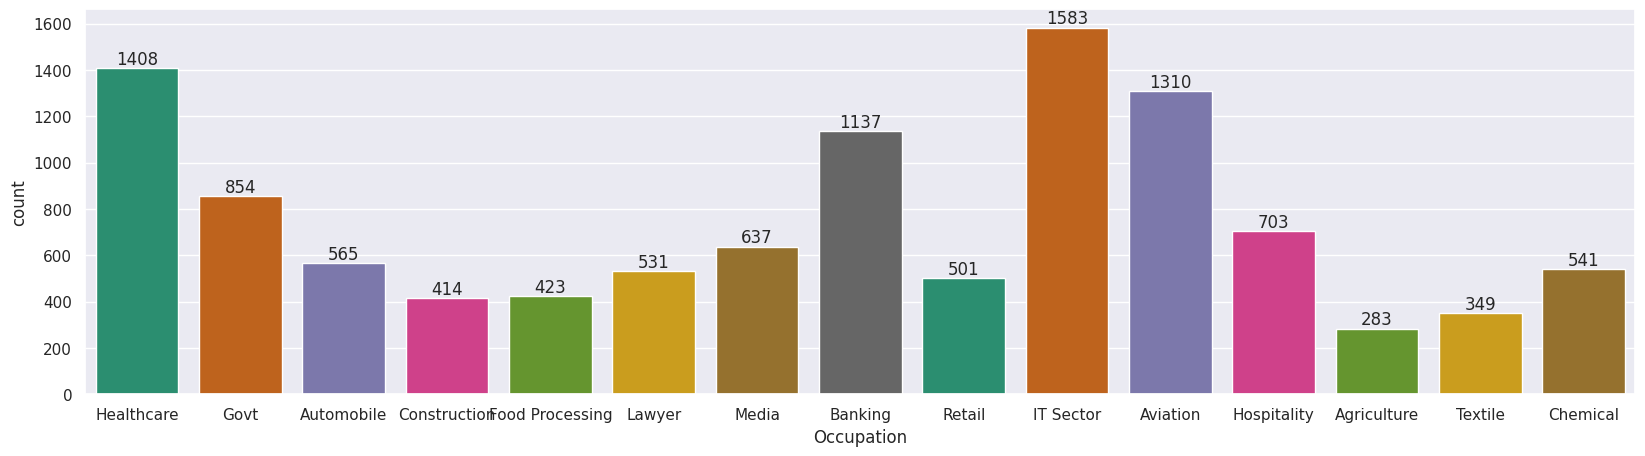

In [41]:
sns.set(rc={'figure.figsize':(20,5)})
ax = sns.countplot(data = df, x = 'Occupation', palette='Dark2')
for bar in ax.containers:
  ax.bar_label(bar)

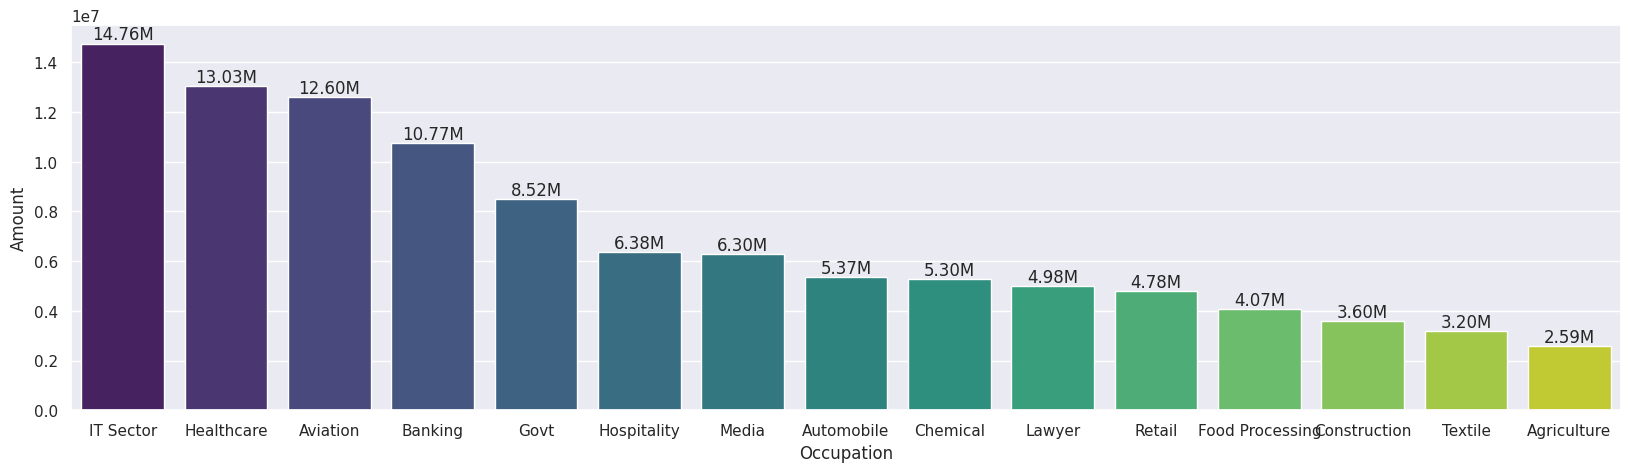

In [48]:
sales_state = df.groupby(['Occupation'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
sns.set(rc={'figure.figsize' :(20,5)})
ax = sns.barplot (data = sales_state, x = 'Occupation', y = 'Amount', palette='viridis')
for bar in ax.containers:
  ax.bar_label(bar, labels=[f'{v.get_height() / 1e6:.2f}M' for v in bar])

From above graphs we can see that most of the buyers are working in IT Sector, Healthcare, Aviation and Banking.

#### Product Category

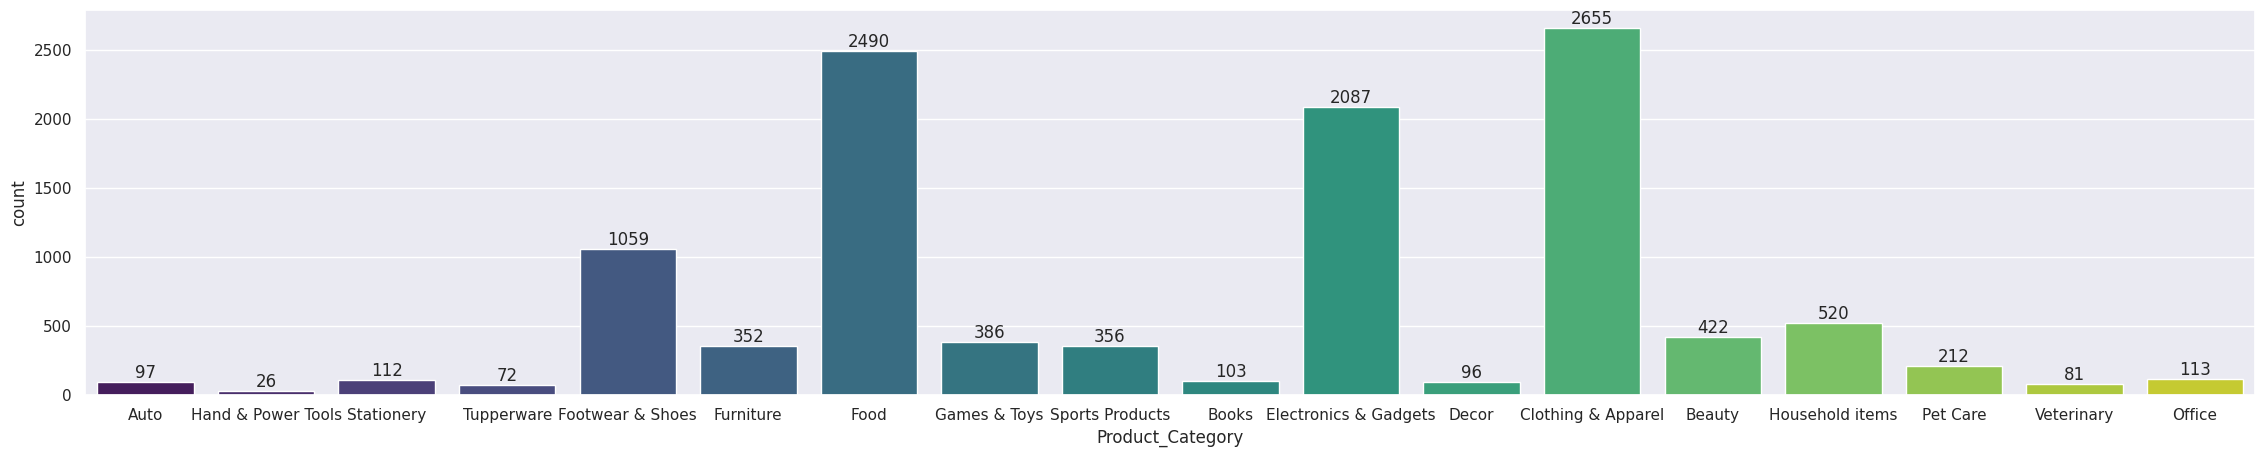

In [43]:
sns.set(rc={'figure.figsize':(28,5)})
ax = sns.countplot(data = df, x = 'Product_Category', palette='viridis')
for bar in ax.containers:
  ax.bar_label(bar)

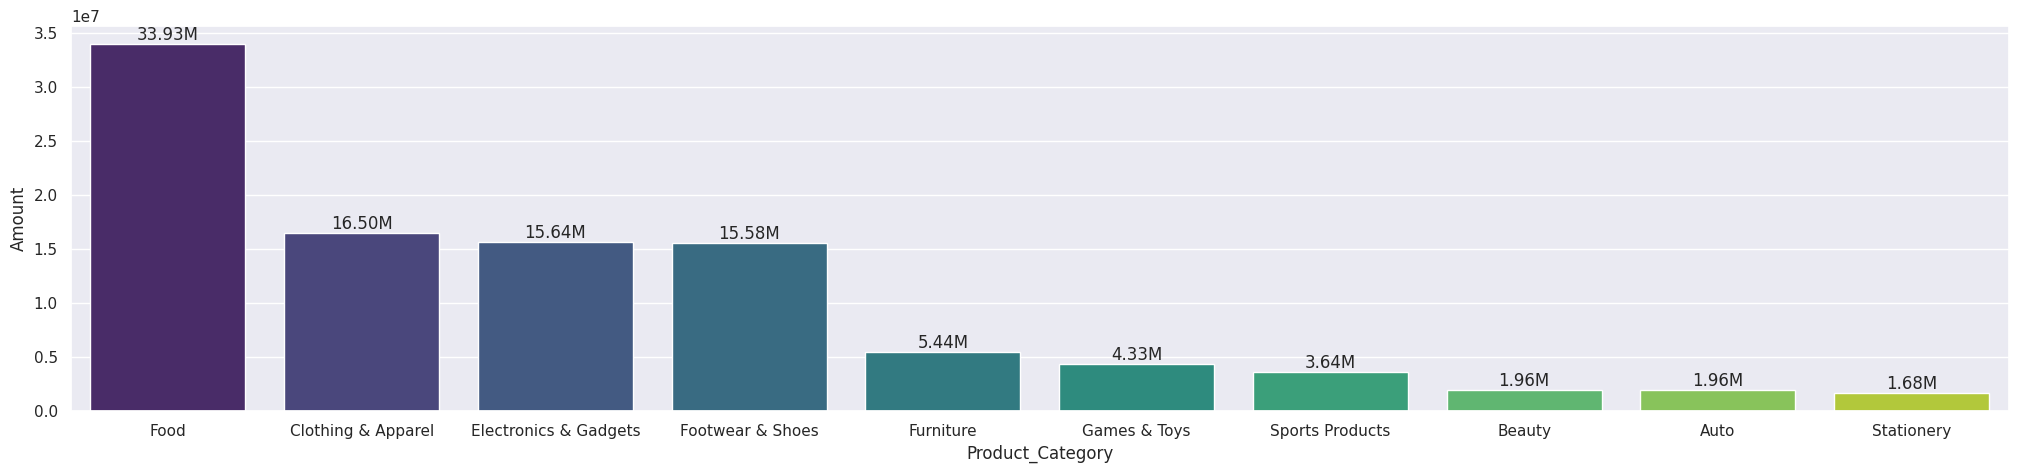

In [50]:
sales_state = df.groupby(['Product_Category'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)
sns.set(rc={'figure.figsize':(25,5)})
ax = sns.barplot (data = sales_state, x = 'Product_Category', y = 'Amount', palette='viridis')
for bar in ax.containers:
  ax.bar_label(bar, labels=[f'{v.get_height() / 1e6:.2f}M' for v in bar])

From above graphs we can see that most of the sold product are from Food, Clothing & Apparel and Electronics & Gadgets

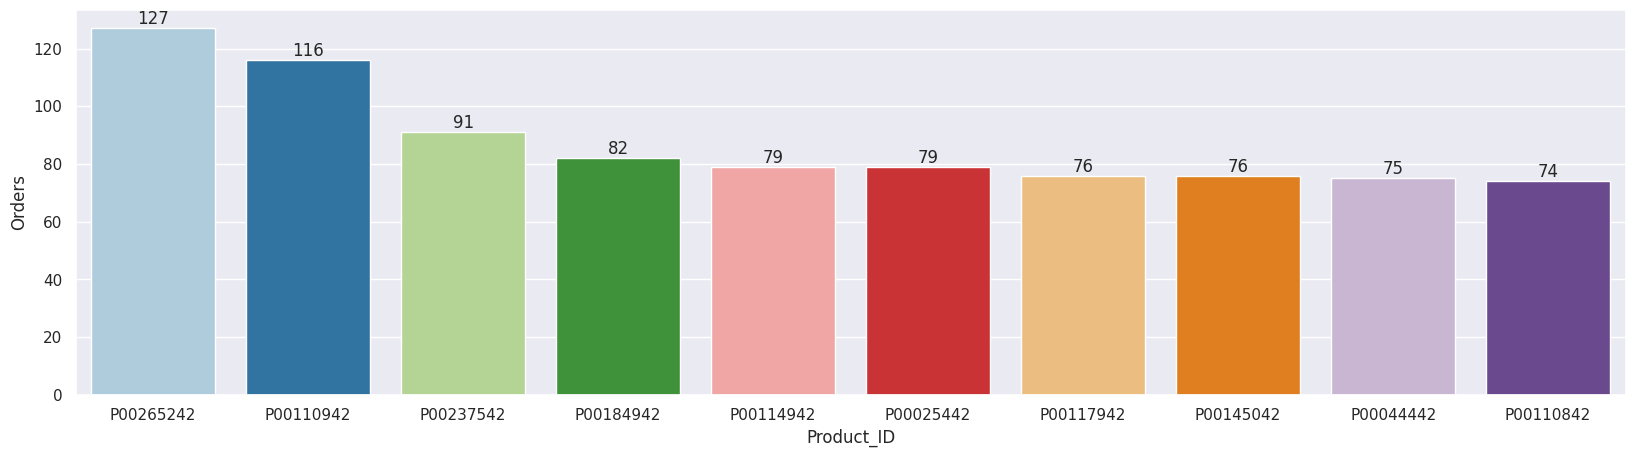

In [54]:
sales_state = df.groupby(['Product_ID'], as_index= False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)
sns.set(rc={'figure.figsize':(20,5)})
ax = sns.barplot (data = sales_state, x = 'Product_ID', y = 'Orders', palette='Paired')
for bar in ax.containers:
  ax.bar_label(bar)


<Axes: xlabel='Product_ID'>

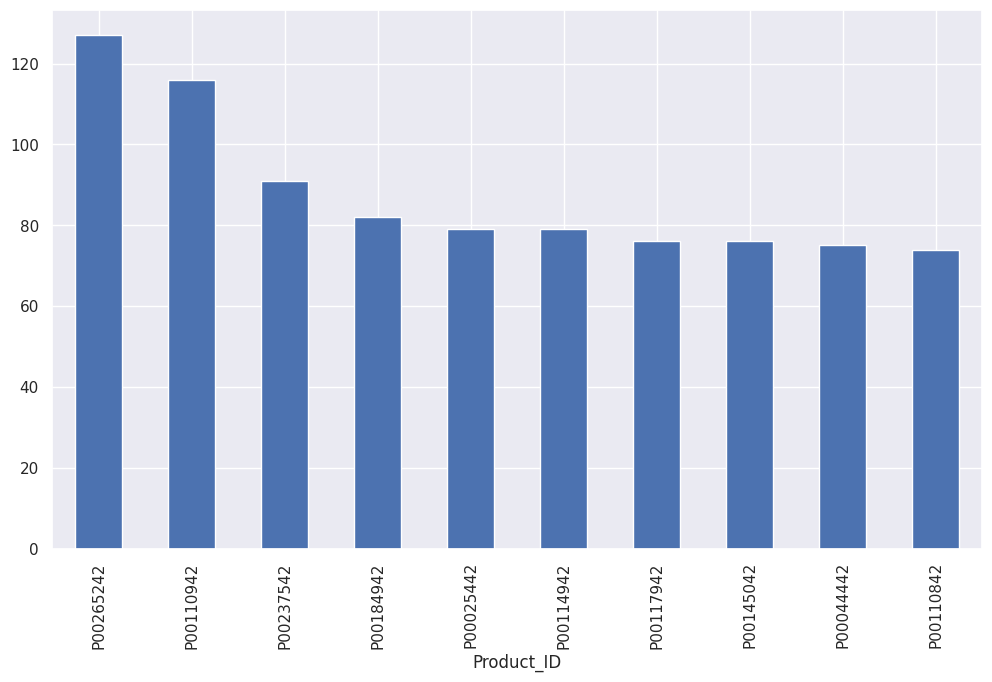

In [ ]:
# top 10 most sold product
fig1, ax1 = plt.subplots (figsize = (12,7))
df.groupby('Product_ID')['Orders'].sum().nlargest(10).sort_values(ascending=False).plot(kind='bar')

###Conclusion
Married women age group 26-35 years from UP, Maharashtra, Karnataka working in IT, Healthcare and Aviation are more likely to buy Product from Food, Clothing and Electronic Category.